In [1]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
import lightgbm as lgb  
import matplotlib.pyplot as plt  
# # 读取DataFrame数据  
# df = pd.read_csv('stock.csv')  
  
# # 分割数据为训练集和测试集  
# train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)  
  
# # 定义特征和目标列  
# features = train_df.columns[1:]  # 假设特征列从第二列开始  
# target = 'OLHC'  # 替换为你的目标列名称  
data = pd.read_csv('stock.csv')  
train_size = int(len(data) * 0.9)  
train_data = data[:train_size]  
test_data = data[train_size:]  


Bad key text.latex.preview in file /home/frank/miniconda3/envs/condatest/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/frank/miniconda3/envs/condatest/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/frank/miniconda3/envs/condatest/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95    

In [2]:
# 定义特征和目标列  
features = train_data.columns[1:]  # 假设特征列从第二列开始  
target = 'OLHC'  # 替换为你的目标列名称  

In [4]:

  
# 创建LightGBM数据集  
train_dataset = lgb.Dataset(train_data[features], label=train_data[target])  
test_dataset = lgb.Dataset(test_data[features], label=test_data[target])  
  
# 设置LightGBM参数  
params = {  
    'objective': 'regression',  # 替换为你的任务类型，如分类问题可以使用'binary'或'multiclass'  
    'metric': 'mse',  # 替换为你的评估指标，如分类问题可以使用'binary_logloss'或'multi_logloss'  
    'num_leaves': 31,  
    'learning_rate': 0.05,  
    'feature_fraction': 0.9,  
    'bagging_fraction': 0.8,  
    'bagging_freq': 5,  
    'verbose': 0  
}  

# 训练LightGBM模型  
model = lgb.train(params, train_dataset, num_boost_round=100)  
  
# 在测试集上进行预测  
predictions = model.predict(test_data[features])  
  
# 打印预测结果  
print(predictions)  

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

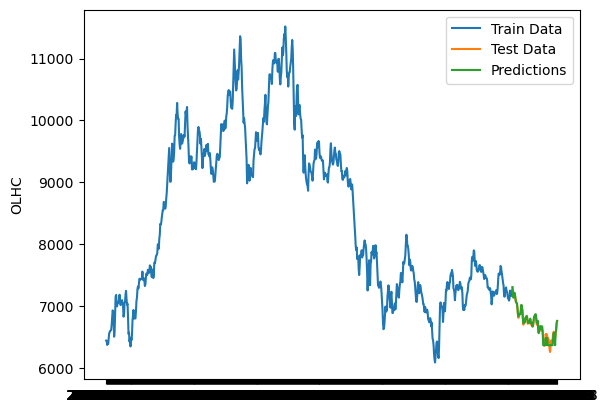

In [7]:
train_dates = train_data['date']  
train_olhc = train_data['OLHC']  
test_dates = test_data['date']  
test_olhc = test_data['OLHC']  
  
# Make predictions on the test set (replace this with your own predictions)  

  
# Plot train data, test data, and predictions  
plt.plot(train_dates, train_olhc, label='Train Data')  
plt.plot(test_dates, test_olhc, label='Test Data')  
plt.plot(test_dates, predictions, label='Predictions')  
  
# Add legend and labels  
plt.legend()  
# plt.xlabel('date')
plt.ylabel('OLHC')  
# Rotate x-axis labels for better date display  

  
# Display the plot  
plt.show()  

In [6]:
from sklearn.metrics import mean_absolute_error 
  
# 计算训练集和测试集的预测值  
  
# 计算训练集和测试集的实际值  
train_actual = train_data['OLHC'].values  
test_actual = test_data['OLHC'].values  
  
# 计算MSE  
# train_mae = mean_absolute_error(train_actual, train_predicted)  
test_mae = mean_absolute_error(test_actual, predictions)  
  
# print("Train MSE:", train_mae)  
print("Test MSE:", test_mae)  

Test MSE: 26.185684960624172
